This notebook is for Machine Learning Specialization, Course 1
Visit via this link: 
<a href="https://www.coursera.org/learn/machine-learning/home/week/1" target="_blank"><button>Visit Course</button></a>


# Supervised Machine Learning: Regression and Classification

## Import modules

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math

## Main Content

### Linear Regression

Input:
- $\text{x}$: data
- $\text{y}$: target value

Model: (vectorize input variables and its coefficient)

\begin{equation}
f_{\text{w}, b}(\text{x}) = \text{w} \cdot \text{x} + b
\end{equation}

Where:
- $\text{w} = [w_1, w_2, w_3, \dots, w_m]$
- $\text{x}$: array with $m$ examples with $n$ features
- $\hat{\text{y}} = f_{\text{w}, b}$ is the predicted value

#### Gradient Descent

- Goal: adjusting $\text{w}, b$ to minimize the cost function
\begin{equation}
    J(\text{w}, b) = \frac{1}{2m}\sum_{i = 0}^{m - 1}(f_{\text{w}, b}(\text{x}_i) - y_i)^2
\end{equation}

- Pseudocode:
$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\text{w},b)}{\partial w_j} \tag{5}  \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\text{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, $n$ is the number of features, parameters $w_j$,  $b$, are updated simultaneously and where  

$$
\begin{align}
\frac{\partial J(\text{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\text{w},b}(\text{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{6}  \\
\frac{\partial J(\text{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\text{w},b}(\text{x}^{(i)}) - y^{(i)}) \tag{7}
\end{align}
$$
* $m$ is the number of training examples in the data set

    
*  $f_{\text{w},b}(\text{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value

In [16]:
def compute_cost(x, y, w, b): 
    """
    compute cost
    Args:
      x (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """
    m = x.shape[0]
    cost = 0.0
    for i in range(m):                                
        f_wb_i = np.dot(x[i], w) + b           #(n,)(n,) = scalar (see np.dot)
        cost = cost + (f_wb_i - y[i])**2       #scalar
    cost = cost / (2 * m)                      #scalar    
    return cost

In [17]:
def compute_gradient(x, y, w, b):
  """
  Computes the gradient for linear regression 
  Args:
    x (ndarray (m,n)): Data, m examples with n features
    y (ndarray (m,)) : target values
    w (ndarray (n,)) : model parameters  
    b (scalar)       : model parameter
    
  Returns:
    dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
    dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
  """
  m, n = x.shape
  dj_dw = np.zeros((n,))
  dj_db = 0.

  for i in range(m):
    err = (np.dot(x[i], w) + b) - y[i]
    dj_db += err
    for j in range(n):
      dj_dw[j] += err * x[i, j]
  return dj_db / m, dj_dw / m

In [43]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters): 
    """
    Performs batch gradient descent to learn w and b. Updates w and b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters  
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,)) : Updated values of parameters 
      b (scalar)       : Updated value of parameter 
      """
    J_history = []
    w = copy.deepcopy(w_in) 
    b = b_in
    
    for i in range(num_iters):

        dj_db, dj_dw = compute_gradient(x, y, w, b)   

        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               
      
        if i<100000:      # prevent resource exhaustion 
            J_history.append(compute_cost(x, y, w, b))
        
        if np.all(np.abs(dj_dw) < epsilon) and abs(dj_db) < epsilon:
            print(f"Convergence reached at iteration {i}")
            break
        
        
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return w, b

In [44]:
# Generate synthetic data
np.random.seed(0)
x_train = np.random.rand(100, 1)  # 100 training examples with 1 feature
y_train = 5 * x_train + np.random.randn(100, 1) * 0.5  # y = 5x + noise

# Reshape y_train to be a 1-dimensional array
y_train = y_train.reshape(-1)

# Initialize parameters
initial_w = np.zeros(x_train.shape[1])
initial_b = 0.0

# Set hyperparameters
alpha = 0.01
num_iters = 1000
epsilon = 0.001

# Perform gradient descent
w, b = gradient_descent(x_train, y_train, initial_w, initial_b, alpha, num_iters)

print(f"w: {w}, b: {b}")

Iteration    0: Cost     4.09   
Iteration  100: Cost     0.96   
Iteration  200: Cost     0.64   
Iteration  300: Cost     0.56   
Iteration  400: Cost     0.50   
Iteration  500: Cost     0.45   
Iteration  600: Cost     0.41   
Iteration  700: Cost     0.38   
Iteration  800: Cost     0.34   
Iteration  900: Cost     0.32   
w: [2.9699848], b: 1.1238448178362728


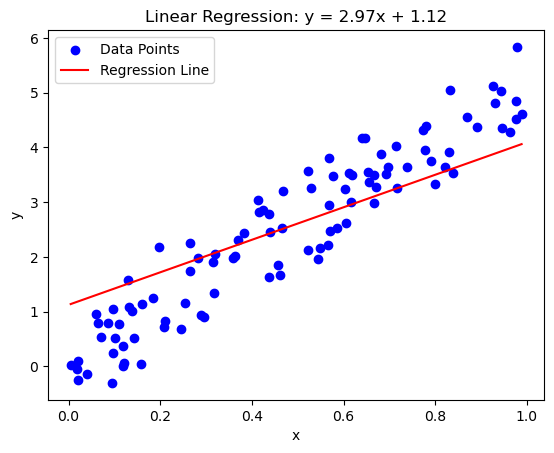

In [45]:
# Plot the data points
plt.scatter(x_train, y_train, color='blue', label='Data Points')

# Plot the regression line
x_values = np.linspace(x_train.min(), x_train.max(), 100)
y_values = w * x_values + b
plt.plot(x_values, y_values, color='red', label='Regression Line')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Show function equation
plt.title(f'Linear Regression: y = {w[0]:.2f}x + {b:.2f}')

plt.show()

#### Feature Engineering


Feature engineering involves creating new features or modifying existing ones to improve the performance of machine learning models. This process can include:

- **Creating interaction terms**: Combining two or more features to capture their interaction.
- **Scaling and normalization**: Standardizing features to have a mean of 0 and a standard deviation of 1, or scaling them to a fixed range.

In addition, (in later courses)
- **Binning**: Converting continuous variables into categorical ones by dividing them into intervals.
- **Encoding categorical variables**: Converting categorical variables into numerical format using techniques like one-hot encoding.
- **Handling missing values**: Imputing missing values using mean, median, mode, or more sophisticated methods.

**Feature scaling** is a technique used to normalize the range of independent variables or features of data. The goal of feature scaling is to ensure that all features contribute equally to the model's performance, especially when the features have different units or scales. 

There are 3 ways: Dividing the maximum value, mean normalization, z-score normalization (most common).


In [49]:
def zscore_norm(x):
    mu = np.mean(x, axis = 0)
    sigma = np.std(x, axis = 0)
    x_norm = (x - mu)/sigma
    return x_norm, mu, sigma

Scaling helps gradient descent run faster (less iterations), while get accurate result.

**Polynomial features** involve creating new features by raising existing features to a power. This can help capture non-linear relationships between features and the target variable. 

**Benefits**:
- Captures non-linear relationships.
- Can improve model performance if the underlying relationship is non-linear.

**Drawbacks**:
- Can lead to overfitting if the degree is too high.
- Increases the complexity of the model.

To reduce complexity, scale the polynomial features.

In [47]:
x_train_poly = np.c_[x_train, x_train**2]
y_train_poly = (x_train ** 2).reshape(-1)

initial_w = np.zeros(x_train_poly.shape[1])
initial_b = 0

alpha = 0.01 
num_iters = 100000
epsilon = 1e-6

w_poly, b_poly = gradient_descent(x_train_poly, y_train_poly, initial_w, initial_b, alpha, num_iters)
print(f"w: {w_poly}, b: {b_poly}")


Iteration    0: Cost     0.09   
Iteration 10000: Cost     0.00   
Iteration 20000: Cost     0.00   
Iteration 30000: Cost     0.00   
Iteration 40000: Cost     0.00   
Iteration 50000: Cost     0.00   
Iteration 60000: Cost     0.00   
Iteration 70000: Cost     0.00   
Iteration 80000: Cost     0.00   
Iteration 90000: Cost     0.00   
w: [0.0271705  0.97291493], b: -0.004553559082834554


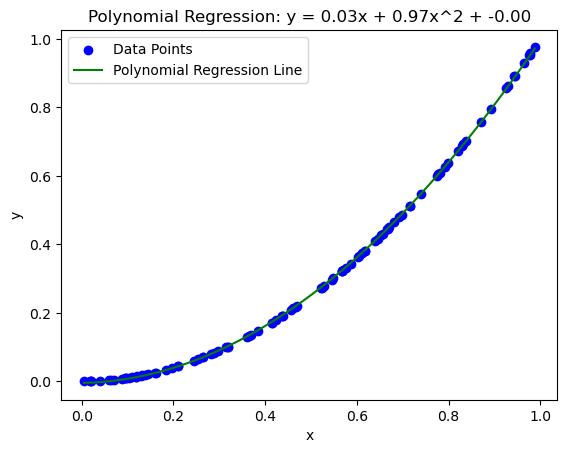

In [48]:
# Plot the data points for polynomial regression
plt.scatter(x_train_poly[:, 0], y_train_poly, color='blue', label='Data Points')

# Plot the polynomial regression line
x_values_poly = np.linspace(x_train_poly[:, 0].min(), x_train_poly[:, 0].max(), 100)
y_values_poly = w_poly[0] * x_values_poly + w_poly[1] * (x_values_poly**2) + b_poly
plt.plot(x_values_poly, y_values_poly, color='green', label='Polynomial Regression Line')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Show function equation
plt.title(f'Polynomial Regression: y = {w_poly[0]:.2f}x + {w_poly[1]:.2f}x^2 + {b_poly:.2f}')

plt.show()

#### Regularization

Issues when training data:
- Underfit: does not fit training set very well (high bias)
- Overfit: fits training set extreme well (learning all noise, fluctuation of data), may perform worse for new examples. (high variance)

Address:
- Collect more training examples
- Select features to include/exclude
- Regularization

Regularization: adding penalty to model's loss function, discouraging overly complex models, improving generalization.
  

Regularized cost function:
\begin{equation}
    J(\text{w}, b) = \frac{1}{2m}\sum_{i = 0}^{m - 1}(f_{\text{w}, b}(\text{x}_i) - y_i)^2 + \frac{\lambda}{2m}\sum_{j = 0}^{n - 1}w_j^2
\end{equation}


In [52]:
def compute_cost_reg(x, y, w, b, lambda_):
    """
    Computes the cost over all examples
    Args:
      x (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
      lambda_ (scalar): Controls amount of regularization
    Returns:
      total_cost (scalar):  cost 
    """
    m, n = x.shape[0], len(w)
    cost = 0
    for i in range(m):
        f_wb_i = np.dot(w[i], x[i]) + b
        cost += (f_wb_i - y[i])**2
    cost /= (2 * m)

    reg_cost = 0
    for j in range(n):
        reg_cost += (w[j] ** 2)
    reg_cost *= (lambda_/(2 * m))
    return cost + reg_cost
    

Regularized gradient descent:

In [54]:
def compute_gradient_reg(x, y, w, b, lambda_):
    """
    Computes the gradient for linear regression 
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
      lambda_ (scalar): Controls amount of regularization
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """
    m, n = x.shape
    dj_dw = np.zeros(n,)
    dj_db = 0.
    
    for i in range(m):
        err = (np.dot(w[i], x[i]) + b) - y[i]
        for j in range(n):
            dj_dw[j] += err * x[i][j]
        dj_db += err

    dj_dw /= m
    dj_db /= m

    for j in range(n):
        dj_dw[j] += (lambda_/m) * w[j]
    
    return dj_db, dj_dw

Adjust the gradient function inside gredient descent algorithm, complete regularized gradient descent.

### Logistic Regression

Input:
- $\text{x}$: data
- $\text{y}$: target value

Algorithm: substitute into sigmoid function
\begin{equation}
    f_{\text{w}, b}(\text{x}) = g(\text{w}\text{x} + b) = \frac{1}{1 + e^{-(\text{w}\text{x} + b)}}, \quad f \in (0, 1)
\end{equation}
And conduct gradient descent, just like linear regression.
Assume threshold is $0.5$
- If predicted value is smaller, then predicted value $ = \lceil 0.5 \rceil = 0$.
- if predicted value is greater, then predicted value $ = \lfloor 0.5 \rfloor = 1$

Interpret: probability that class/category is 1

In [51]:
def sigmoid(z):
    return 1/(1 + e ** (-z))

**Decision boundary**: Graph of $z = 0$
- If $z >= 0$, then predicted value is $1$.
- If $z < 0$, then predicted value is $0$.

#### Gradient Descent

Loss function:
\begin{equation}
L(f_{\text{w}, b}(\text{x}_i), y_i) = -y_i\log(f_{\text{w}, b}(\text{x}_i)) - (1 - y_i)\log(1 - f_{\text{w}, b}(\text{x}_i))
\end{equation}

This is a convex function, meaning there's only 1 local minima.

Cost function:
\begin{equation}
J(\text{w}, b) = \frac{1}{m}\sum_{i = 1}^mL(f_{\text{w}, b}(\text{x}_i), y_i)
\end{equation}

In [56]:
def compute_logistic_cost(x, y, w, b):
    m, n = x.shape
    cost = 0
    for i in range(m):
        f_wb_i = sigmoid(np.dot(w[i], x[i]) + b)
        cost += (-y[i] * np.log(f_wb_i) + (1 - y[i]) * np.log(1 - f_wb_i))
    return cost / m

Gradient Descent: same as Linear Regression

In [57]:
def compute_logistic_gradient(x, y, w, b):
    m, n = x.shape
    dj_dw = np.zeros(n,)
    dj_db = 0
    for i in range(m):
        err = sigmoid(np.dot(w[i], x[i]) + b) - y[i]
        for j in range(n):
            dj_dw[j] += err * x[i][j]
        dj_db += err

    return dj_db / m, dj_dw / m


#### Regularization

Regularized cost function:
\begin{equation}
J(\text{w}, b) = \frac{1}{m}\sum_{i = 1}^mL(f_{\text{w}, b}(\text{x}_i), y_i) + \frac{\lambda}{2m}\sum_{j = 0}^{n - 1}w_j^2
\end{equation}


In [58]:
def compute_logistic_cost_reg(x, y, w, b, lambda_):
    m, n = x.shape
    cost = 0
    for i in range(m):
        f_wb_i = sigmoid(np.dot(w[i], x[i]) + b)
        cost += (-y[i] * np.log(f_wb_i) + (1 - y[i]) * np.log(1 - f_wb_i))

    cost /= m
    reg_cost = 0
    for j in range(n):
        reg_cost += (w[j] ** 2)
    reg_cost *= (lambda_/(2 * m))
    return cost + reg_cost

Regualarized gradient descent:

In [59]:
def compute_logistic_gradient_reg(x, y, w, b, lambda_):
    m, n = x.shape
    dj_dw = np.zeros(n,)
    dj_db = 0
    for i in range(m):
        err = sigmoid(np.dot(w[i], x[i]) + b) - y[i]
        for j in range(n):
            dj_dw[j] += err * x[i][j]
        dj_db += err
    
    dj_dw /= m
    dj_db /= m

    for j in range(n):
        dj_dw[j] += (lambda_/m) * w[j]

    return dj_db, dj_dw